In [34]:
%pip install h5py
%pip install xarray
%pip install netCDF4
%pip install satpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [116]:
import h5py
import matplotlib.pyplot as plt
import xarray as xr
import matplotlib.gridspec as gridspec
import matplotlib.pylab as pl
from matplotlib import colors
import matplotlib.patches as mpatches
import matplotlib as mpl
import requests
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from satpy import available_readers


In [50]:
available_readers()

['abi_l1b',
 'abi_l1b_scmi',
 'abi_l2_nc',
 'acspo',
 'agri_fy4a_l1',
 'agri_fy4b_l1',
 'ahi_hrit',
 'ahi_hsd',
 'ahi_l1b_gridded_bin',
 'amsr2_l1b',
 'amsr2_l2',
 'amsr2_l2_gaasp',
 'amsub_l1c_aapp',
 'atms_l1b_nc',
 'atms_sdr_hdf5',
 'avhrr_l1b_aapp',
 'avhrr_l1b_eps',
 'avhrr_l1c_eum_gac_fdr_nc',
 'cmsaf-claas2_l2_nc',
 'electrol_hrit',
 'epic_l1b_h5',
 'fci_l1c_nc',
 'fci_l2_nc',
 'geocat',
 'ghi_l1',
 'ghrsst_l2',
 'glm_l2',
 'goes-imager_hrit',
 'goes-imager_nc',
 'gpm_imerg',
 'hsaf_h5',
 'hy2_scat_l2b_h5',
 'iasi_l2',
 'iasi_l2_cdr_nc',
 'jami_hrit',
 'li_l2_nc',
 'maia',
 'meris_nc_sen3',
 'mhs_l1c_aapp',
 'mimicTPW2_comp',
 'mirs',
 'msu_gsa_l1b',
 'mtsat2-imager_hrit',
 'mviri_l1b_fiduceo_nc',
 'mws_l1b_nc',
 'nucaps',
 'nwcsaf-geo',
 'nwcsaf-msg2013-hdf5',
 'nwcsaf-pps_nc',
 'oceancolorcci_l3_nc',
 'olci_l1b',
 'olci_l2',
 'omps_edr',
 'safe_sar_l2_ocn',
 'satpy_cf_nc',
 'seviri_l1b_hrit',
 'seviri_l1b_native',
 'seviri_l1b_nc',
 'slstr_l1b',
 'smos_l2_wind',
 'tropomi_l2',

In [51]:
filenames = ['../data/MSG3-SEVI-MSG15-0100-NA-20230421181241.751000000Z-NA/MSG3-SEVI-MSG15-0100-NA-20230421181241.751000000Z-NA.nat']

In [52]:
from satpy import Scene
scn = Scene(reader="seviri_l1b_native", filenames=filenames)
scn.load([0.6, 0.8, 10.8])
scn.load(['VIS006', 'VIS008', 'IR_120', 'IR_134'])

/Users/mark/miniforge3/envs/thesis/lib/python3.11/site-packages/pyproj/crs/crs.py:1286: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)


In [53]:
visible = scn['VIS006']

In [54]:
othervis = scn['VIS008']

In [55]:
infrared =scn['IR_120']

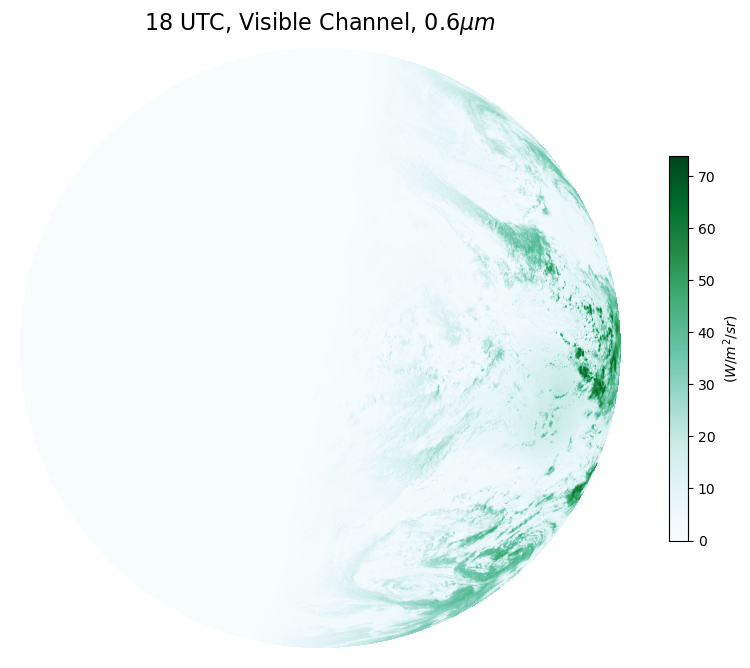

In [56]:
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(visible, cmap='BuGn')
plt.colorbar(shrink=1/2, label=r'$(W/m^2/sr)$')
plt.title(r'18 UTC, Visible Channel, $0.6\mu m$', fontsize=16)
plt.show()

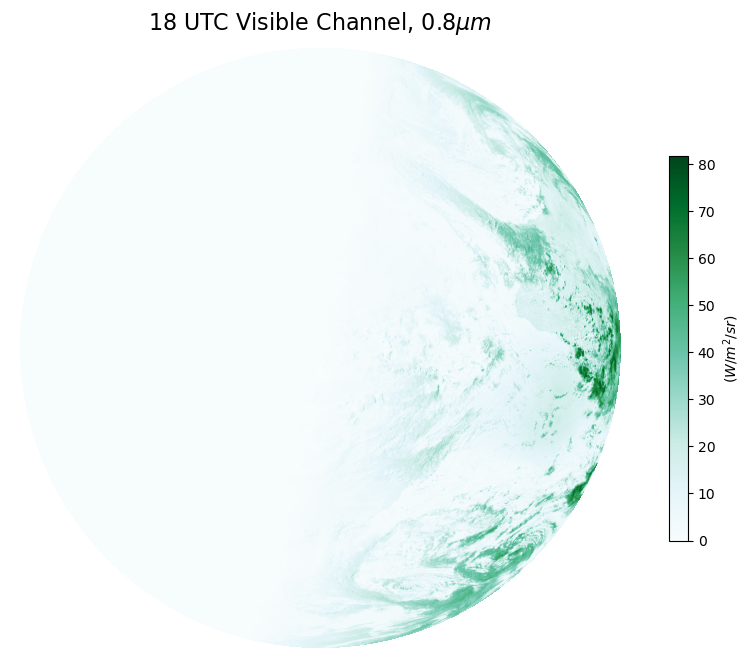

In [57]:
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(othervis, cmap='BuGn')
plt.colorbar(shrink=1/2, label=r'$(W/m^2/sr)$')
plt.title(r'18 UTC Visible Channel, $0.8\mu m$', fontsize=16)
plt.show()

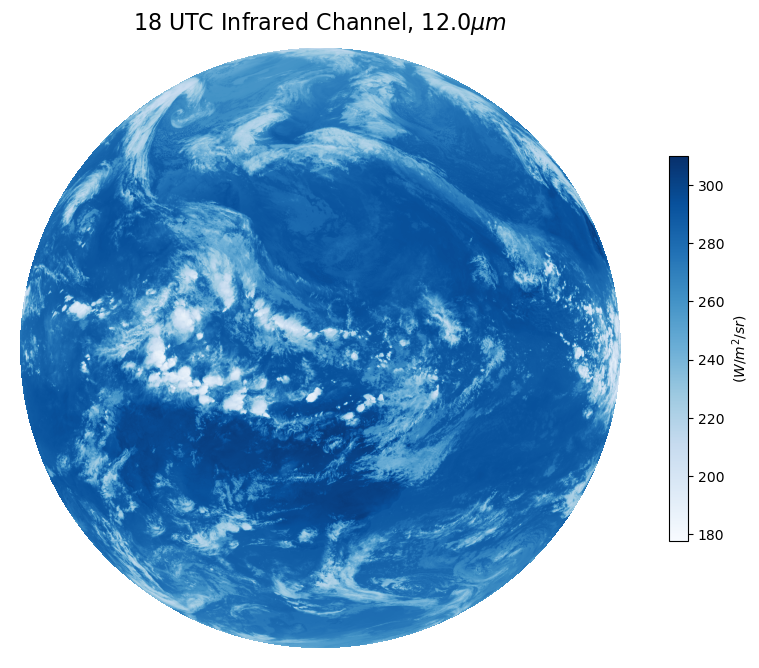

In [131]:
plt.figure(figsize=(10, 10))
plt.axis('off')
# RdPu
plt.imshow(infrared, cmap='Blues')
plt.colorbar(shrink=1/2, label=r'$(W/m^2/sr)$')
plt.title(r'18 UTC Infrared Channel, $12.0\mu m$', fontsize=16)
plt.show()

In [59]:
infraredother = scn['IR_108']

In [60]:
cartopy.config['data_dir']

'/Users/mark/.local/share/cartopy'

/Users/mark/miniforge3/envs/thesis/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


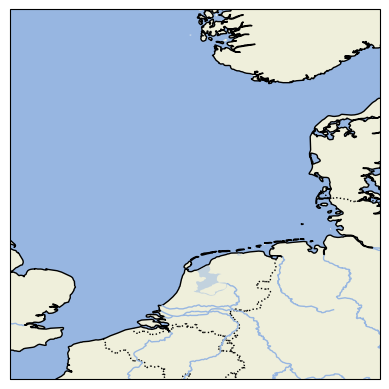

In [61]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([0, 10, 50, 60], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

plt.show()

In [62]:
plt.imshow(radarFile['reflectivity'])

NameError: name 'radarFile' is not defined

In [63]:
fig = plt.figure()
widths = [3.6,9, 3.6]
heights = [9, 3.6]

cmap = colors.ListedColormap(['silver','white', 'darkslateblue', 'mediumblue','dodgerblue', 'skyblue','olive','mediumseagreen'
                              ,'cyan','lime','yellow','khaki','burlywood','orange','brown','pink','red','plum'])

bounds = [-1,0,2,4,6,8,10,15,20,25,30,35,40,45,50,55,60,65]
norm = colors.BoundaryNorm(bounds, cmap.N)

#interpolated data
plt.imshow(interpolated_data, cmap=cmap, norm=norm) 
ax.set_title('Rainfall (interpolated on the mask grid)',fontsize = 9.5)

NameError: name 'interpolated_data' is not defined

<Figure size 640x480 with 0 Axes>

In [64]:
radarFile = h5py.File('../data/radar_nl_202304211800.h5')

In [65]:
keys = list(radarFile.keys())

In [66]:
radarFile['sourceimage']

<HDF5 dataset "sourceimage": shape (1660, 1340, 3), type "|u1">

In [67]:
radarFile['sourceimage']

<HDF5 dataset "sourceimage": shape (1660, 1340, 3), type "|u1">

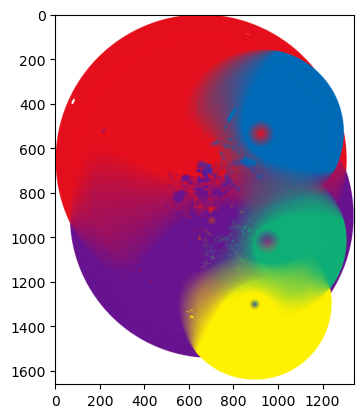

In [68]:
plt.imshow(radarFile['sourceimage'])

In [69]:
radarFile['sourceimage']

<HDF5 dataset "sourceimage": shape (1660, 1340, 3), type "|u1">

echotopheight


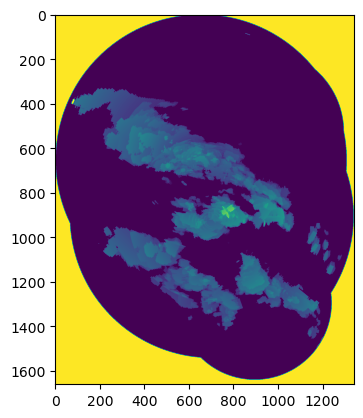

geographic
key not an image
image1
key not an image
overview
key not an image
precipitationrate


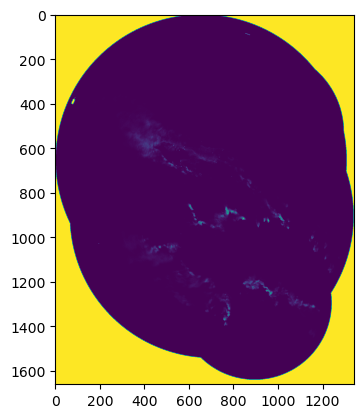

radar1
key not an image
radar2
key not an image
radar3
key not an image
radar4
key not an image
radar5
key not an image
reflectivity


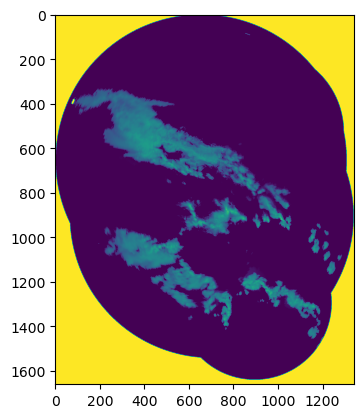

reflectivitymax


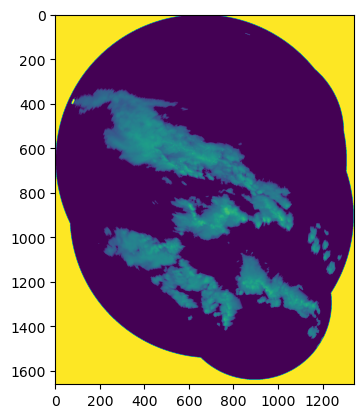

sourceimage


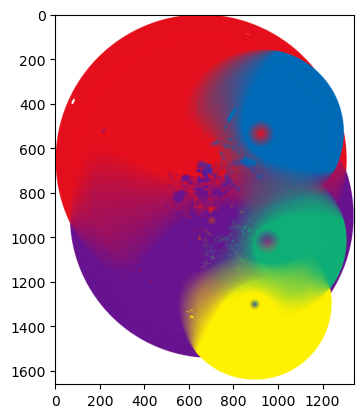

visualisation1
key not an image


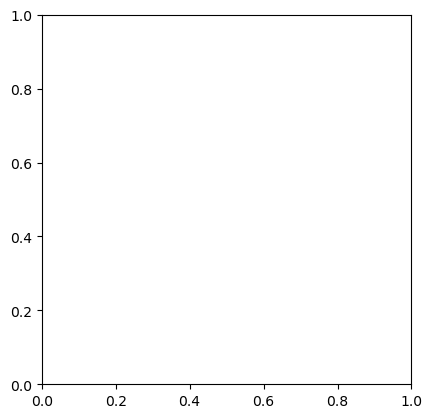

In [70]:
for key in keys:
    print(key)
    try:
        plt.imshow(radarFile[key])
        plt.show()
    except:
        print(f'key not an image')

<HDF5 dataset "reflectivity": shape (1660, 1340), type "|u1">

In [91]:
cutOffRadar = np.array(radarFile['reflectivity'][:])
cutOffRadar = np.where(np.isin(cutOffRadar, 255), 0, cutOffRadar)

In [92]:
cutOffRadar

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

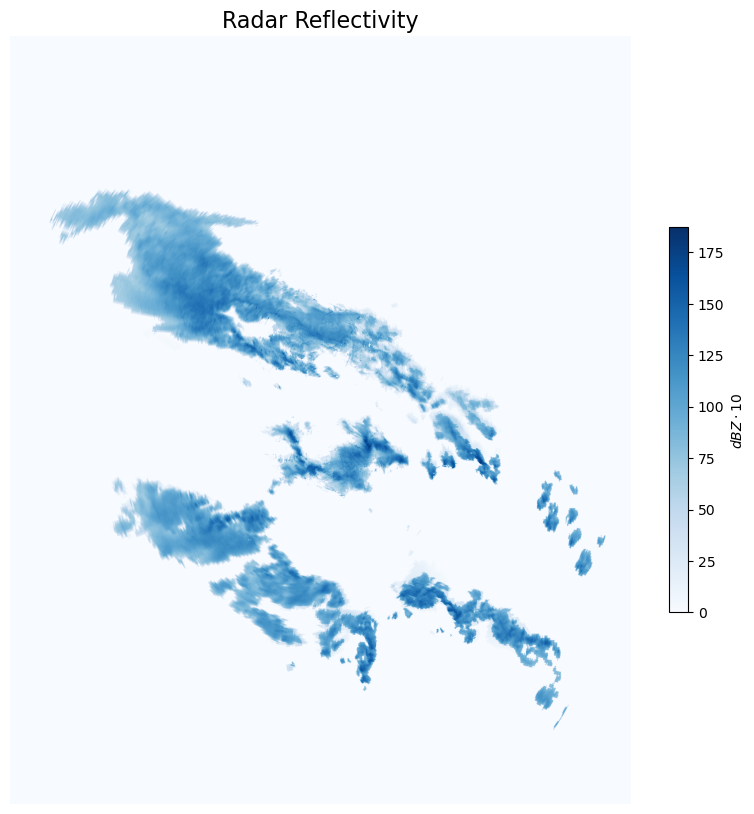

In [127]:
plt.figure(figsize=(10, 10))
plt.axis('off')
# RdPu
plt.imshow(cutOffRadar, cmap='Blues')
plt.colorbar(shrink=1/2, label=r'$dBZ \cdot 10$')
plt.title(r'Radar Reflectivity', fontsize=16)
plt.show()

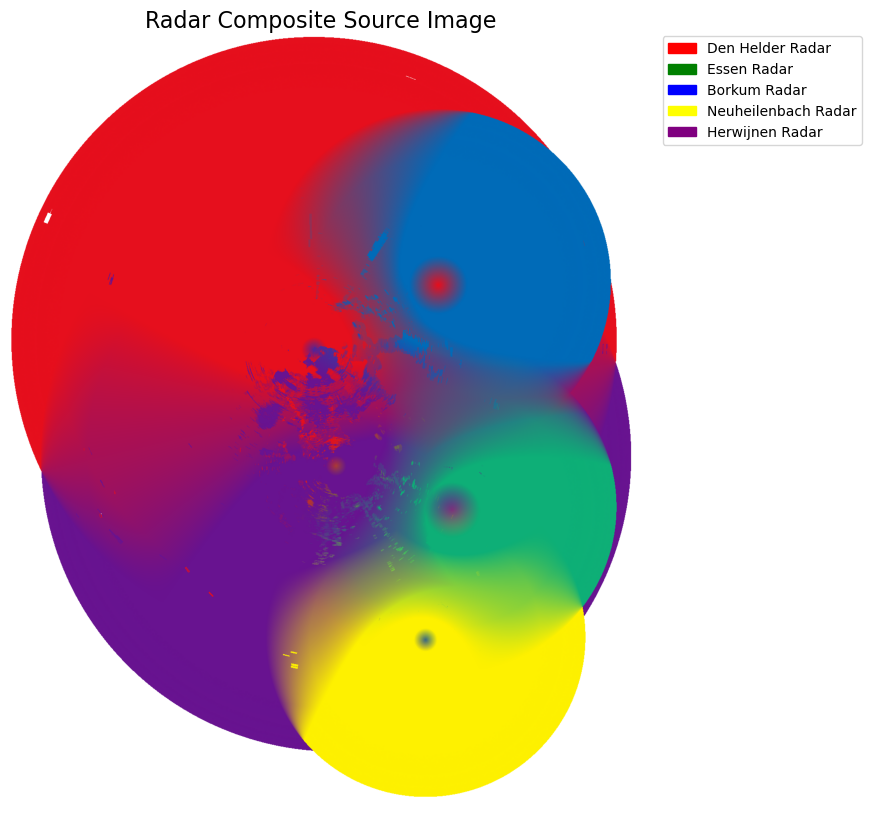

In [120]:
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(radarFile['sourceimage'])
plt.title(r'Radar Composite Source Image', fontsize=16)

patches = [
    mpatches.Patch(color="red", label="Den Helder Radar" ),
    mpatches.Patch(color="green", label="Essen Radar" ),
    mpatches.Patch(color="blue", label="Borkum Radar" ),
    mpatches.Patch(color="yellow", label="Neuheilenbach Radar" ),
    mpatches.Patch(color="purple", label="Herwijnen Radar" ),

]

# put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )

plt.show()